# Ensemble methods. Exercises


In this section we have only two exercise:

1. Find the best three classifier in the stacking method using the classifiers from scikit-learn package.

2. Build arcing arc-x4 method. 

In [2]:
%store -r data_set
%store -r labels
%store -r test_data_set
%store -r test_labels
%store -r unique_labels

## Exercise 1: Find the best three classifier in the stacking method

Please use the following classifiers:

* Linear regression,
* Nearest Neighbors,
* Linear SVM,
* Decision Tree,
* Naive Bayes,
* QDA.

In [3]:
import numpy as np
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [4]:
def test_classifiers():
    lreg = LinearRegression()
    lreg.fit(data_set, labels)

    knn = KNeighborsClassifier()
    knn.fit(data_set, labels)

    svc = SVC()
    svc.fit(data_set,labels)

    dt = DecisionTreeClassifier()
    dt.fit(data_set,labels)

    nb = GaussianNB()
    nb.fit(data_set,labels)

    qda = QuadraticDiscriminantAnalysis()
    qda.fit(data_set,labels)

    return lreg, knn, svc, dt, nb, qda

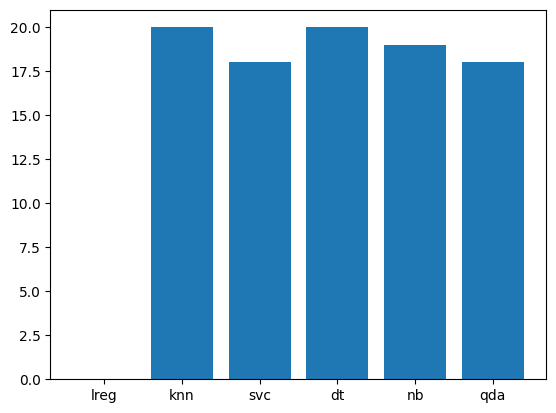

In [5]:
def calculate_accuracy_vector(predicted, labels):
    result = []
    for i in range(len(predicted)):
        if predicted[i] == labels[i]:
            result.append(1)
        else:
            result.append(0)
    return result

def build_grading_classifier(classifiers):
    output = []
    matrix = []
    for classifier in classifiers:
        predicted = classifier.predict(data_set)
        output.append(predicted)
        matrix.append(calculate_accuracy_vector(predicted,labels))

    grading_classifiers = []
    for i in range(len(classifiers)):
        tree = DecisionTreeClassifier()
        tree.fit(data_set, matrix[i])
        grading_classifiers.append(tree)
    return grading_classifiers

def test_prediction(classifiers, grading_classifiers, i):
    prediction = classifiers[i].predict(test_data_set)
    grad = grading_classifiers[i].predict(test_data_set)
    return prediction, grad

classifiers = test_classifiers()
grading_classifiers = build_grading_classifier(classifiers)
names = ['lreg', 'knn', 'svc', 'dt', 'nb', 'qda']
sums_grad = []
for i in range(len(classifiers)):
    prediction, grad = test_prediction(classifiers, grading_classifiers, i)
    # print(f'scores for the {names[i]} model: {prediction}\n{grad}\n{test_labels}\nsum of scores:{sum(grad)}')
    sums_grad.append(sum(grad))

import matplotlib.pyplot as plt
plt.bar(names, sums_grad)
plt.show()

In [6]:
def build_classifiers():
    knn = KNeighborsClassifier()
    knn.fit(data_set, labels)

    dt = DecisionTreeClassifier()
    dt.fit(data_set,labels)

    svc = SVC()
    svc.fit(data_set, labels)

    return knn, dt, svc
# lreg, qda, svc,

In [7]:
def build_stacked_classifier(classifiers, stacked_classifier):
    output = []
    # print(classifiers)
    for classifier in classifiers:
        output.append(classifier.predict(data_set))
    output = np.array(output).reshape((130,3))
    
    # stacked classifier part:
    # stacked_classifier = SVC()
    stacked_classifier.fit(output.reshape((130,3)), labels.reshape((130,)))
    test_set = []
    for classifier in classifiers:
        test_set.append(classifier.predict(test_data_set))
    test_set = np.array(test_set).reshape((len(test_set[0]),3))
    predicted = stacked_classifier.predict(test_set)
    return predicted

In [8]:
classifiers = build_classifiers()
lreg = LinearRegression()
qda = QuadraticDiscriminantAnalysis()
svc = SVC()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
nb = GaussianNB()
for meta_classifier in [qda, svc, knn, dt, nb]:
    predicted = build_stacked_classifier(classifiers, meta_classifier)
    accuracy = accuracy_score(test_labels, predicted)
    print(accuracy)

0.1
0.1
0.0
0.15
1.0


D:\Anaconda\envs\ml\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [9]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# prepare data set

def generate_data(sample_number, feature_number, label_number):
    data_set = np.random.random_sample((sample_number, feature_number))
    labels = np.random.choice(label_number, sample_number)
    return data_set, labels

# labels = 2
dimension = 2
test_set_size = 1000
train_set_size = 5000
train_set, train_labels = generate_data(train_set_size, dimension, labels)
test_set, test_labels = generate_data(test_set_size, dimension, labels)

# init weights
# number_of_iterations = 10
# weights = np.ones((test_set_size,)) / test_set_size

def calculate_accuracy_vector(predicted, labels):
    result = []
    for i in range(len(predicted)):
        if predicted[i] == labels[i]:
            result.append(0)
        else:
            result.append(1)
    return result

def train_model(classifier, weights):
    return classifier.fit(X=test_set, y=test_labels, sample_weight=weights)

def calculate_error(model):
    predicted = model.predict(test_set)
    I=calculate_accuracy_vector(predicted, test_labels)
    Z=np.sum(I)
    return (1+Z)/1.0

Fill the two functions below:

## Exercise 2:

Use the boosting method and change the code to fullfilt the following requirements:

* the weights should be calculated as:
$w_{n}^{(t+1)}=\frac{1+ I(y_{n}\neq h_{t}(x_{n}))}{\sum_{i=1}^{N}1+I(y_{i}\neq h_{t}(x_{i}))}$,
* the prediction is done with a voting method.

In [10]:
def set_new_weights(model):
    results = np.array(calculate_accuracy_vector(model.predict(test_set), test_labels))
    new_weights = (1 + results) / (sum([result for result in results]) * 1.0)
    return new_weights

Train the classifier with the code below:

In [34]:
classifier = DecisionTreeClassifier(max_depth=1, random_state=1)
classifier.fit(X=train_set, y=train_labels)
alphas = []
classifiers = []
number_of_iterations = 10
weights = np.ones((test_set_size,)) / test_set_size
for iteration in range(number_of_iterations):
    print(weights[:100])
    model = train_model(classifier, weights)
    weights = set_new_weights(model)
    classifiers.append(model)

[0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001]
[0.0033389  0.0033389  0.0033389  0.0033389  0.00166945 0.0033389
 0.00166945 0.0033389  0.00166945 0.0033389  0.0033389  0.00166945
 0.0033389  0.0033389  0.0033389  0.0033389  0.0033389  0.0033389
 0.0033389  0.0033389  0.0033389  0.00166945 0.00166945 0.0033389
 0.00166945 0.0033389  0.0033389  0.00166945 0.0033389  0.0033389
 0.0033389  0.0033389  0.0033389  0.0033389  0.00166945 0.0

Set the validation data set:

Fill the prediction code:

In [40]:
from collections import Counter

def get_prediction(x):
    predicion = [classifier.predict(x).tolist()[0] for classifier in classifiers]
    return Counter(predicion)

validate_x, validate_label = generate_data(1, dimension, 2)
prediction = get_prediction(validate_x).most_common()

print(prediction)
print(validate_label)

[(0, 10)]
[0]


Test it: